In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#1.Display the statistical summary about the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
#2.Check to see if the dataset contains any Null values. If so, replace the null value with that column mean/mode as appropriate.
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
for col in data.columns:
  if (data[col].isnull()).any()==True:
    if data[col].dtype=='float':
      data[col]=data[col].replace(np.nan,data[col].mean())
    if data[col].dtype=='object':
      data[col]=data[col].replace(np.nan,data[col].mode()[0])
print(data.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [ ]:
#3. Check whether any feature has zero as its value. If required, replace with mean/mode value
(data==0).sum(axis=0)


Date                 0
Location             0
MinTemp            159
MaxTemp             14
Rainfall         91080
Evaporation        244
Sunshine          2359
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am      8745
WindSpeed3pm      1112
Humidity9am          1
Humidity3pm          4
Pressure9am          0
Pressure3pm          0
Cloud9am          8642
Cloud3pm          4974
Temp9am             36
Temp3pm             17
RainToday            0
RainTomorrow         0
dtype: int64

In [ ]:
mean_Evaporation=round(data['Evaporation'].mean(),2)
data['Evaporation']=data['Evaporation'].replace([0],mean_Evaporation)


In [ ]:
#4.Drop the given irrelevant features from dataset: ["Date","Location","WindGustDir","WindDir9am","WindDir3pm"]
df=data.drop(["Date","Location","WindGustDir","WindDir9am","WindDir3pm"],axis=1)
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

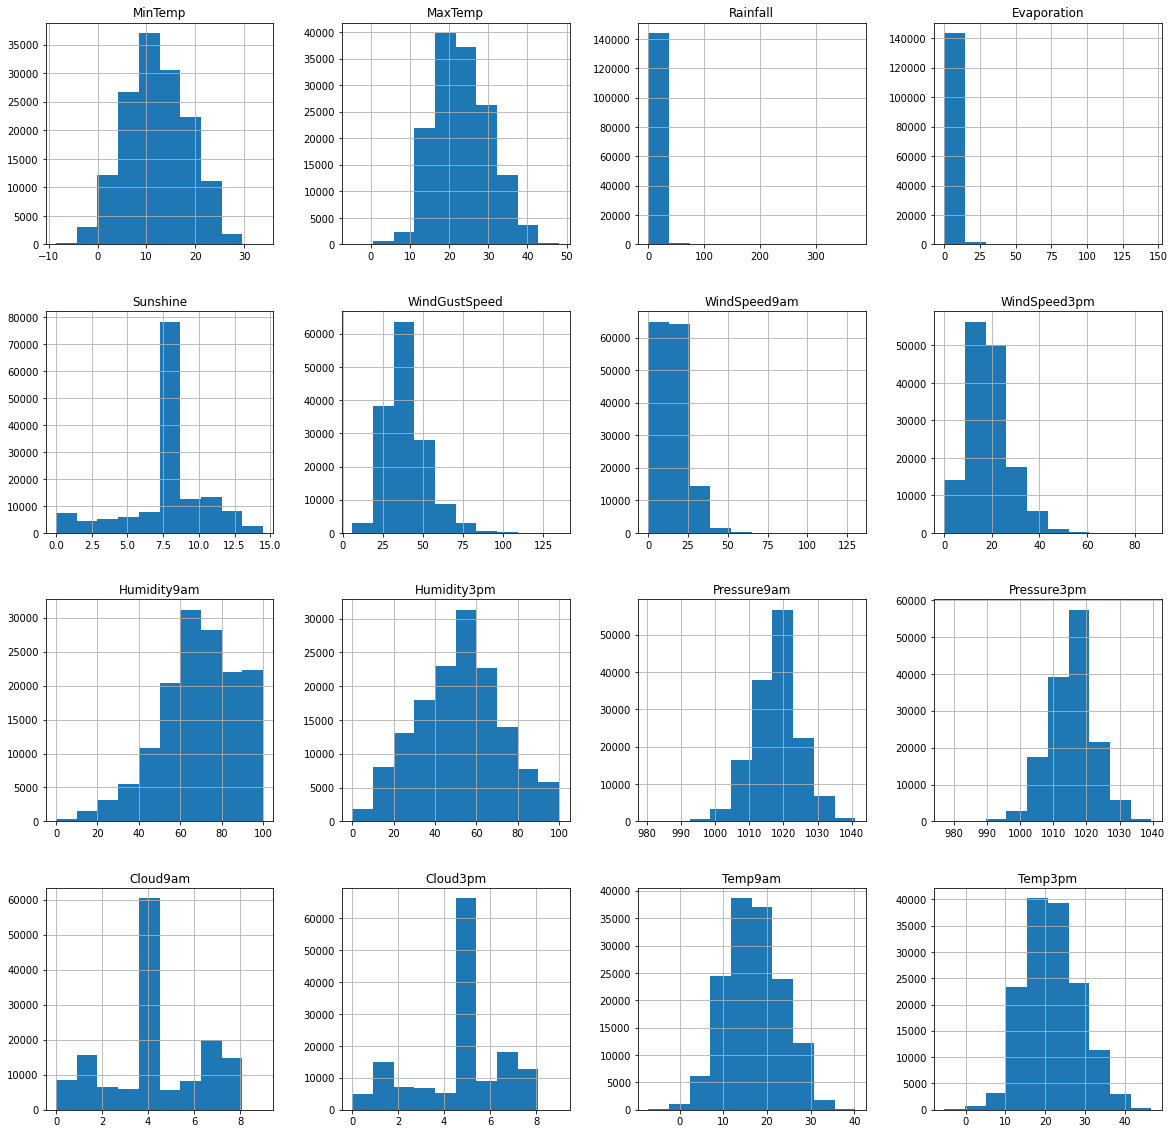

In [ ]:
#5. Plot histogram for each feature to check the distribution of data for each feature
p=df.hist(figsize=(20,20))

In [ ]:
df["RainTomorrow"].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
df["RainToday"].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

In [ ]:
from sklearn import preprocessing
lable_encoder=preprocessing.LabelEncoder()
df["RainTomorrow"]=lable_encoder.fit_transform(df["RainTomorrow"])
df["RainToday"]=lable_encoder.fit_transform(df["RainToday"])

In [ ]:
df["RainToday"].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [ ]:
x=df.drop(["RainTomorrow"],axis=1)
y=df["RainTomorrow"]

In [ ]:
x_array=x.values
y_array=y.values
print("X values as array:\n", x_array)
print("Y Values as array:\n",y_array)

X values as array:
 [[13.4        22.9         0.6        ... 16.9        21.8
   0.        ]
 [ 7.4        25.1         0.         ... 17.2        24.3
   0.        ]
 [12.9        25.7         0.         ... 21.         23.2
   0.        ]
 ...
 [ 5.4        26.9         0.         ... 12.5        26.1
   0.        ]
 [ 7.8        27.          0.         ... 15.1        26.
   0.        ]
 [14.9        23.22134828  0.         ... 15.         20.9
   0.        ]]
Y Values as array:
 [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x_array)
print(x_scaled)

[[ 1.89446615e-01 -4.53363105e-02 -2.10071794e-01 ... -1.40531282e-02
   1.70232282e-02 -5.29795450e-01]
 [-7.53100728e-01  2.65043084e-01 -2.81649838e-01 ...  3.24642790e-02
   3.81984952e-01 -5.29795450e-01]
 [ 1.10901003e-01  3.49692009e-01 -2.81649838e-01 ...  6.21684769e-01
   2.21401794e-01 -5.29795450e-01]
 ...
 [-1.06728318e+00  5.18989861e-01 -2.81649838e-01 ... -6.96308433e-01
   6.44757393e-01 -5.29795450e-01]
 [-6.90264238e-01  5.33098015e-01 -2.81649838e-01 ... -2.93157571e-01
   6.30158924e-01 -5.29795450e-01]
 [ 4.25083451e-01  2.10513377e-14 -2.81649838e-01 ... -3.08663373e-01
  -1.14362992e-01 -5.29795450e-01]]


In [ ]:
c=pd.DataFrame(x_scaled)
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.189447,-4.533631e-02,-0.210072,-0.00291,-1.952415e-15,0.302234,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.568037e+00,-8.487347e-16,-0.014053,0.017023,-0.529795
1,-0.753101,2.650431e-01,-0.281650,-0.00291,-1.952415e-15,0.302234,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,-3.920285e-16,-8.487347e-16,0.032464,0.381985,-0.529795
2,0.110901,3.496920e-01,-0.281650,-0.00291,-1.952415e-15,0.454694,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,-3.920285e-16,-1.199232e+00,0.621685,0.221402,-0.529795
3,-0.470337,6.741796e-01,-0.281650,-0.00291,-1.952415e-15,-1.222364,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-3.920285e-16,-8.487347e-16,0.172017,0.703151,-0.529795
4,0.833521,1.280830e+00,-0.162353,-0.00291,-1.952415e-15,0.073544,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,1.126652e+00,1.667539e+00,0.125499,1.170302,-0.529795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,-0.00291,-1.952415e-15,-0.688755,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,-3.920285e-16,-8.487347e-16,-1.068448,0.104614,-0.529795
145456,-1.350047,2.932594e-01,-0.281650,-0.00291,-1.952415e-15,-1.374824,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,-3.920285e-16,-8.487347e-16,-0.944401,0.411182,-0.529795
145457,-1.067283,5.189899e-01,-0.281650,-0.00291,-1.952415e-15,-0.231375,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,-3.920285e-16,-8.487347e-16,-0.696308,0.644757,-0.529795
145458,-0.690264,5.330980e-01,-0.281650,-0.00291,-1.952415e-15,-0.917445,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,0.186693,-6.388874e-01,-1.199232e+00,-0.293158,0.630159,-0.529795


In [ ]:
#6. Split the data into features and target variables. Normalize the feature variables.
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,train_size=0.8,random_state=100)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)

In [ ]:
from sklearn import metrics
print("Accuracy Score(Training Dataset) =", format(metrics.accuracy_score( pred_train,ytrain)))
print("Accuracy Score(Test Dataset) =", format(metrics.accuracy_score( pred_test,ytest)))

Accuracy Score(Training Dataset) = 0.8441925615289426
Accuracy Score(Test Dataset) = 0.8400934964938814


In [ ]:
from sklearn import svm #support vector machine

In [ ]:
svc=svm.SVC(kernel='poly')#,degree=3,C=1,decision_function_shape='ovo')

In [ ]:
svc.fit(xtrain,np.ravel(ytrain))

SVC(kernel='poly')

In [ ]:
svm_pred_train=svc.predict(xtrain)
svm_pred_test=svc.predict(xtest)

In [ ]:
from sklearn import metrics
print("Accuracy_Score(Training Dataset)=", format(metrics.accuracy_score( svm_pred_train,ytrain)))
print("Accuracy_Score(Test Dataset) =", format(metrics.accuracy_score( svm_pred_test,ytest)))

Accuracy_Score(Training Dataset)= 0.8494517393097759
Accuracy_Score(Test Dataset) = 0.8428777670837344


In [ ]:
from sklearn import metrics
print("Confusion Matrix:\n")
print(metrics.confusion_matrix(ytest,svm_pred_test))

Confusion Matrix:

[[21944   704]
 [ 3867  2577]]


In [ ]:
#k-fold validation for logistic regression model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
lr_list_train_error = []
lr_list_test_error = []

  
for train_index, test_index in kf.split(x_scaled):
    print(test_index)
  
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lr_train = lr.predict(x_train_fold)
    lr_test = lr.predict(x_test_fold)
    fold_train_error = mean_absolute_error(lr_train,y_train_fold)
    lr_list_train_error.append(fold_train_error )
    fold_test_error = mean_absolute_error(lr_test,y_test_fold)
    lr_list_test_error.append(fold_test_error )

[    0     1     2 ... 14543 14544 14545]
[14546 14547 14548 ... 29089 29090 29091]
[29092 29093 29094 ... 43635 43636 43637]
[43638 43639 43640 ... 58181 58182 58183]
[58184 58185 58186 ... 72727 72728 72729]
[72730 72731 72732 ... 87273 87274 87275]
[ 87276  87277  87278 ... 101819 101820 101821]
[101822 101823 101824 ... 116365 116366 116367]
[116368 116369 116370 ... 130911 130912 130913]
[130914 130915 130916 ... 145457 145458 145459]


In [ ]:
#k-fold validation for svm model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
svc_list_train_error = []
svc_list_test_error = []

  
for train_index, test_index in kf.split(c):
    print(test_index)
    
    x_train_fold, x_test_fold = c.iloc[train_index], c.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    svc.fit(x_train_fold, y_train_fold)
    svc_train = svc.predict(x_train_fold)
    svc_test = svc.predict(x_test_fold)
    svc_train_error = mean_absolute_error(svc_train,y_train_fold)
    svc_list_train_error.append(fold_train_error )
    fold_test_error = mean_absolute_error(svc_test,y_test_fold)
    svc_list_test_error.append(fold_test_error )

[    0     1     2 ... 14543 14544 14545]
[14546 14547 14548 ... 29089 29090 29091]
[29092 29093 29094 ... 43635 43636 43637]
[43638 43639 43640 ... 58181 58182 58183]


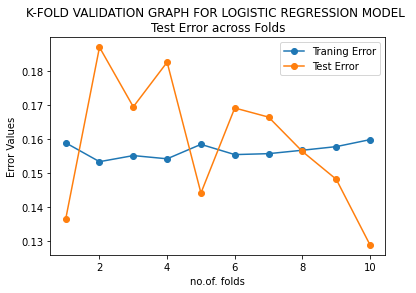

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,kf.get_n_splits()+1),np.array(lr_list_train_error ).ravel(),'o-',label="Traning Error")

plt.plot(range(1,kf.get_n_splits()+1),np.array(lr_list_test_error ),'o-',label="Test Error")

plt.xlabel("no.of. folds")
plt.ylabel("Error Values")
plt.title("K-FOLD VALIDATION GRAPH FOR LOGISTIC REGRESSION MODEL \nTest Error across Folds")
plt.legend()
plt.show()

In [ ]:
plt.plot(range(1,kf.get_n_splits()+1),np.array(svc_list_train_error ),'o-',label="Training Error")
plt.plot(range(1,kf.get_n_splits()+1),np.array(svc_list_test_error ),'o-',label="Test Error")
plt.xlabel("No.of. folds")
plt.ylabel("Test error")
plt.title("K-FOLD VALIDATION GRAPH FOR SVM MODEL\nError across Folds")
plt.legend()
plt.show()
